 # <center><font color='darkblue'><u>JOBATHON</u></font> <font color='lightgreen'><u>AUGUST</u> - <u>2022</u></font><font color='darkblue'> <u>SOLUTION</u></font><br></center>

## *Importing Necessary Library*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from math import sqrt
import keras
from keras.models import Sequential # used to initialize the neural network
from keras.layers import Dense 

# Exclude Warning
import warnings
warnings.filterwarnings("ignore")

## *Loading Train data*

In [2]:
df_train  = pd.read_csv('train_F3fUq2S.csv')
df_train.head()  #-> Showing first Five columns of Data

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


<AxesSubplot:>

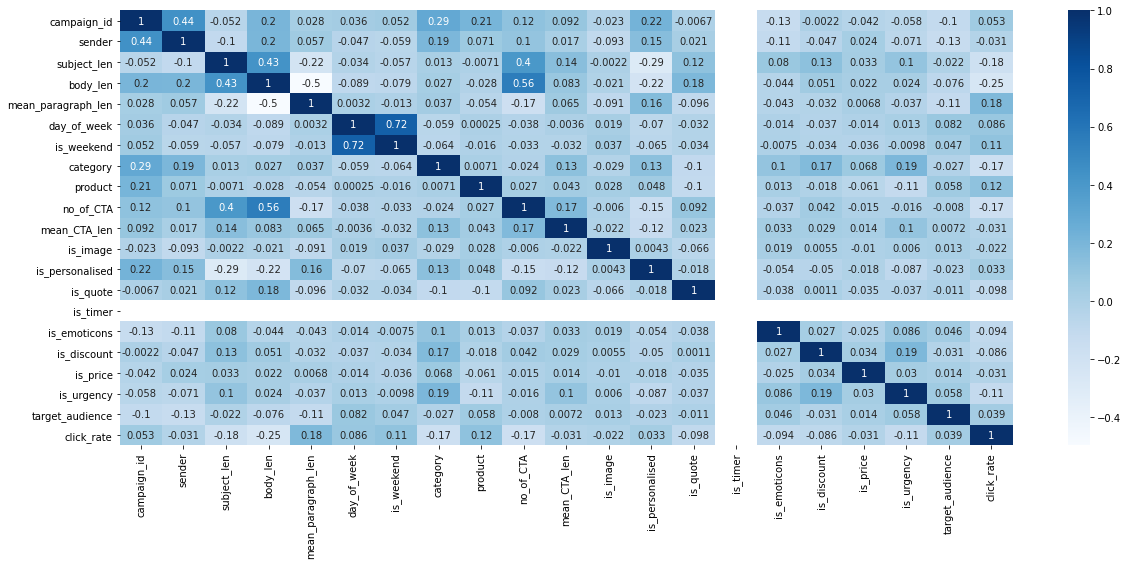

In [3]:
plt.figure(figsize=(20,8))
sns.heatmap(df_train.corr(),annot=True , cmap = 'Blues')

In [4]:
df_train.shape

(1888, 22)

In [5]:
for i in df_train.columns:
    print(i,"    --->    ",df_train[i].nunique())

campaign_id     --->     1888
sender     --->     12
subject_len     --->     170
body_len     --->     1568
mean_paragraph_len     --->     121
day_of_week     --->     7
is_weekend     --->     2
times_of_day     --->     3
category     --->     16
product     --->     43
no_of_CTA     --->     40
mean_CTA_len     --->     79
is_image     --->     6
is_personalised     --->     2
is_quote     --->     7
is_timer     --->     1
is_emoticons     --->     6
is_discount     --->     2
is_price     --->     8
is_urgency     --->     2
target_audience     --->     17
click_rate     --->     1810


In [6]:
df_target = df_train['click_rate']
df_target.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [7]:
#dropping target column from train data
df_train.drop('click_rate', axis = 1, inplace = True)

## *Loading Test data*


In [8]:
df_test = pd.read_csv('test_Bk2wfZ3.csv')
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


## *Concating both the data*


In [9]:
df = pd.concat([df_train, df_test])

In [10]:
# Exploring Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         2650 non-null   int64 
 1   sender              2650 non-null   int64 
 2   subject_len         2650 non-null   int64 
 3   body_len            2650 non-null   int64 
 4   mean_paragraph_len  2650 non-null   int64 
 5   day_of_week         2650 non-null   int64 
 6   is_weekend          2650 non-null   int64 
 7   times_of_day        2650 non-null   object
 8   category            2650 non-null   int64 
 9   product             2650 non-null   int64 
 10  no_of_CTA           2650 non-null   int64 
 11  mean_CTA_len        2650 non-null   int64 
 12  is_image            2650 non-null   int64 
 13  is_personalised     2650 non-null   int64 
 14  is_quote            2650 non-null   int64 
 15  is_timer            2650 non-null   int64 
 16  is_emoticons        2650 

## *Dropping Unnecessary Columns*

In [11]:
df.drop('is_timer',axis =1,inplace=True)

In [12]:
# Categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))
print(f'Categorical Columns : {cat_cols}')

Categorical Columns : ['times_of_day']


In [13]:
# Numerical columns
num_cols = list(df.select_dtypes(exclude = 'O'))
print(f'Numerical Columns : {num_cols}')

Numerical Columns : ['campaign_id', 'sender', 'subject_len', 'body_len', 'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience']


In [14]:
# Unique Values in Categorical Columns
for i in cat_cols:
    print(f'{i} ---> {df[i].nunique()}')

times_of_day ---> 3


<AxesSubplot:>

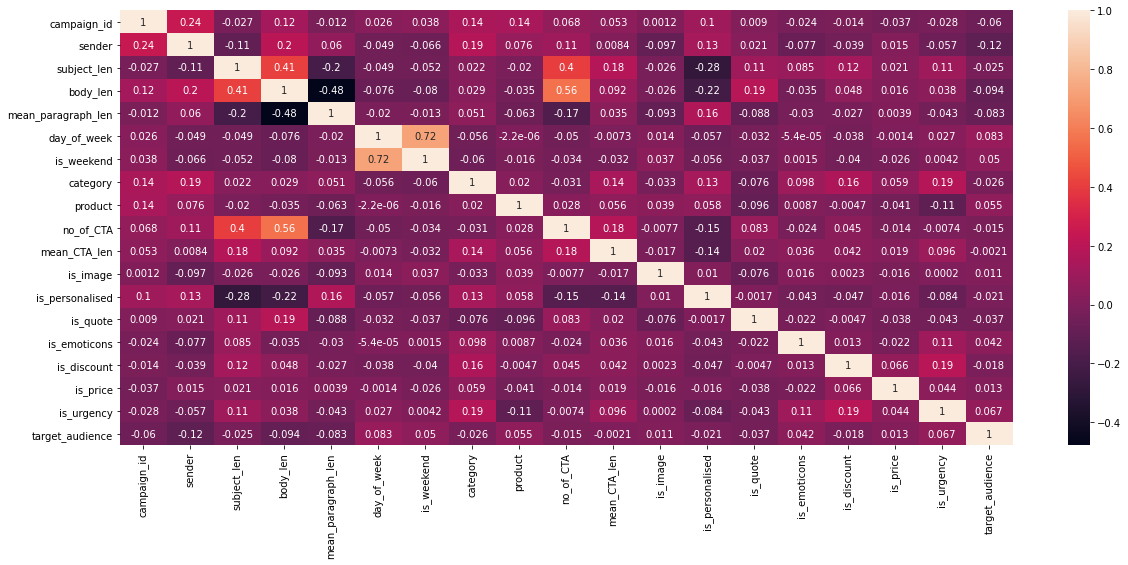

In [15]:
# checking Correlation in data

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)

In [16]:
# Making copy of df

df1 = df.copy()
df1.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,14
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,10
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,16
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,10
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,14


## *Encoding categorical columns*

In [17]:
for i in df1.columns:
    if df1[i].dtype == 'O':
        df1 = pd.get_dummies(df1, columns = [i], drop_first = True)

In [18]:
# Spliting back into Train and Test Data
df1_train = df1.iloc[:1888 :]
df1_test = df1.iloc[1888 : :]

In [19]:
# Showing first Five columns of train data
df1_train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,0,14,0,1
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,0,0,10,1,0
2,3,3,59,12801,16,5,1,2,11,3,...,1,0,1,0,0,0,0,16,0,1
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,0,10,0,0
4,5,3,80,10011,27,5,1,6,26,3,...,0,0,1,0,0,0,0,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,2,11,0,...,0,0,1,0,0,0,0,10,0,1
1884,1885,3,58,10537,40,2,0,2,11,5,...,0,0,0,0,0,0,0,11,0,0
1885,1886,3,89,11050,26,1,0,15,9,4,...,0,0,0,0,0,0,0,6,0,0
1886,1887,3,58,10537,40,1,0,2,11,5,...,0,0,0,0,0,0,0,16,0,0


In [20]:
# Showing first Five columns of test data
df1_test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon
0,1889,3,61,12871,11,6,1,6,26,3,...,1,0,0,1,0,0,0,14,0,1
1,1890,3,54,2569,256,5,1,2,11,0,...,0,0,0,0,0,0,0,10,1,0
2,1891,3,88,1473,78,4,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
3,1892,3,88,1473,78,3,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
4,1893,3,78,9020,29,3,0,6,26,2,...,0,0,0,0,0,0,0,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,15,9,4,...,0,0,0,0,0,0,0,7,0,0
758,2647,3,58,10537,40,3,0,2,11,5,...,0,0,0,0,0,0,0,16,0,0
759,2648,3,100,9132,19,2,0,15,9,2,...,0,0,0,0,0,0,0,15,0,0
760,2649,3,88,1451,75,1,0,2,11,0,...,0,0,1,0,0,0,0,10,0,1


In [21]:
# Appending Global_Sales back to Train data

df1_train['click_rate'] = df_target
df1_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon,click_rate
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0,1,0.103079
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,0,10,1,0,0.700000
2,3,3,59,12801,16,5,1,2,11,3,...,0,1,0,0,0,0,16,0,1,0.002769
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0,0,0.010868
4,5,3,80,10011,27,5,1,6,26,3,...,0,1,0,0,0,0,14,0,1,0.142826


In [22]:
# defining x and y
X = df1_train.drop(['click_rate','campaign_id','body_len'], axis=1)
y = df1_train[['click_rate']]

In [23]:
# Splitting into test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [24]:
campaign_id=df1_test['campaign_id']
df1_test = df1_test.drop(['campaign_id','body_len'], axis=1)

## *Model Building*

### *1) Linear Regression*

In [25]:
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Accuracy of the model
print('Train score: {}'.format(model.score(X_train,y_train)))
# score the test set
print('Test score: {}'.format(model.score(X_test,y_test)))

Train score: 0.14336730500301487
Test score: 0.18976131984375133


### *2) Random Forest Regressor*

In [27]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor


RF = RandomForestRegressor(n_estimators = 1000, 
                           min_samples_split=2,
                           criterion='squared_error',
                           max_features=8,max_depth=100,
                           random_state=0, 
                           n_jobs=-4, verbose =1)
RF.fit(X_train, y_train)
# Training and Testing Score
print("Training Score :",RF.score(X_train, y_train))
print("Testing Score :",RF.score(X_test, y_test))

[Parallel(n_jobs=-4)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-4)]: Done 190 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-4)]: Done 440 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-4)]: Done 790 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Training Score : 0.9325871809298791
Testing Score : 0.4545037112539493


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [28]:
RF_prediction = RF.predict(df1_test)
RF_pred1 = pd.DataFrame({"campaign_id":campaign_id , "click_rate":RF_prediction})
RF_pred1.to_csv("RandomForest_Prediction.csv", index=False)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 1000 out of 1000 | elapsed:    0.1s finished


### *3) XG Boost Regressor*

In [29]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(n_estimators=130,
                          max_depth=5)
xg_reg.fit(X_train,y_train)
print("Train Score: ",xg_reg.score(X_train,y_train))
print("Test Score: ",xg_reg.score(X_test,y_test))

Train Score:  0.9749786651406213
Test Score:  0.27211099935047645


In [30]:
xgb = xg_reg.predict(df1_test)
xgb_df = pd.DataFrame({"campaign_id":campaign_id , "click_rate":xgb})
xgb_df.to_csv("xgb_Prediction.csv", index=False)

### *4) Ada Boost Regressor*

In [32]:
from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor()
abc.fit(X_train,y_train)
print("Train Score: ",abc.score(X_train,y_train))
print("Test Score: ",abc.score(X_test,y_test))

Train Score:  -0.326972499188942
Test Score:  -0.8352376113137738
